In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [81]:
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv(r'/kaggle/input/student-alcohol-consumption/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [84]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [85]:
df.duplicated().sum()

0

No missing or duplicated values present

## About the dataset

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

### Content

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. `sex` - student's sex (binary: 'F' - female or 'M' - male)
3. `age` - student's age (numeric: from 15 to 22)
4. `address` - student's home address type (binary: 'U' - urban or 'R' - rural)
5. `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. `guardian` - student's guardian (nominal: 'mother', 'father' or 'other')
13. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
16. `schoolsup` - extra educational support (binary: yes or no)
17. `famsup` - family educational support (binary: yes or no)
18. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. `activities` - extra-curricular activities (binary: yes or no)
20. `nursery` - attended nursery school (binary: yes or no)
21. `higher` - wants to take higher education (binary: yes or no)
22. `internet` - Internet access at home (binary: yes or no)
23. `romantic` - with a romantic relationship (binary: yes or no)
24. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
26. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
27. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. `health` - current health status (numeric: from 1 - very bad to 5 - very good)
30. `absences` - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
* `G1` - first period grade (numeric: from 0 to 20)
* `G2` - second period grade (numeric: from 0 to 20)
* `G3` - final grade (numeric: from 0 to 20, output target)

**In this notebook, we are gonna be working with only the math students.**

In [86]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# making a copy of the original DataFrame
df2 = df.copy()
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


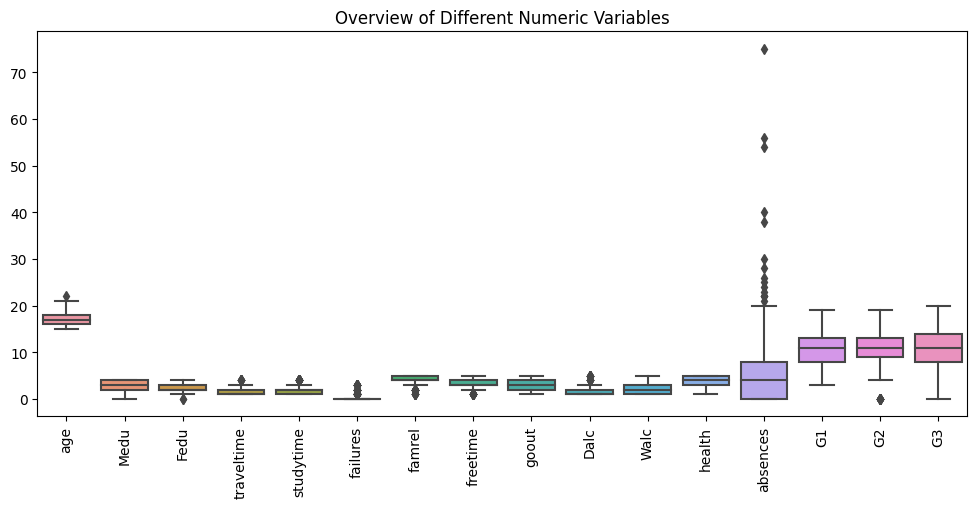

In [88]:
plt.figure(figsize=(12,5))
sns.boxplot(df2)
plt.xticks(rotation=90)
plt.title('Overview of Different Numeric Variables')
plt.show()

There appears to be a few outliers in the data

## Looking at some distributions

In [89]:
for column in df.columns:
    print(df2[column].value_counts())
    print("-" * 50)

school
GP    349
MS     46
Name: count, dtype: int64
--------------------------------------------------
sex
F    208
M    187
Name: count, dtype: int64
--------------------------------------------------
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
--------------------------------------------------
address
U    307
R     88
Name: count, dtype: int64
--------------------------------------------------
famsize
GT3    281
LE3    114
Name: count, dtype: int64
--------------------------------------------------
Pstatus
T    354
A     41
Name: count, dtype: int64
--------------------------------------------------
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
--------------------------------------------------
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
--------------------------------------------------
Mjob
other       141
services    103
at_home      59
teacher      58


## Observations about the dataset

* There appears to be no missing or duplicated values
* There appears to be a few outliers in the data
* There are 16 numeric and 17 categorical columns
* There are a few binary columns (in categorical columns) which can be converted to numeric columns for better interpretation

In [90]:
numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [91]:
categorical_cols = df2.select_dtypes(include='object').columns.tolist()
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Since most of the columns contain binary information or are ranged in a numeric sequence, it's best to encode them.
Encoding these columns using OneHotEncoder would introduce additional unnecessary completexity to the model. So, it's best to map these columns manually.

In [92]:
df2['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

In [93]:
# mapping categorical variables to their numeric values
df2['school'] = df2['school'].map({'GP':0, 'MS':1})
df2['sex'] = df2['sex'].map({'F':0, 'M':1})
df2['address'] = df2['address'].map({'U':0, 'R': 1})
df2['famsize'] = df2['famsize'].map({'LE3':0, 'GT3':1})
df2['Pstatus'] = df2['Pstatus'].map({'T':0, 'A':1})
df2['Mjob'] = df2['Mjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
df2['Fjob'] = df2['Fjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
df2['reason'] = df2['reason'].map({'home':0, 'reputation':1, 'course':2, 'other':3})
df2['guardian'] = df2['guardian'].map({'mother':0, 'father':1, 'other':2})
df2['schoolsup'] = df2['schoolsup'].map({'no':0, 'yes':1})
df2['famsup'] = df2['famsup'].map({'no':0, 'yes':1})
df2['paid'] = df2['paid'].map({'no':0, 'yes':1})
df2['activities'] = df2['activities'].map({'no':0, 'yes':1})
df2['nursery'] = df2['nursery'].map({'no':0, 'yes':1})
df2['higher'] = df2['higher'].map({'no':0, 'yes':1})
df2['internet'] = df2['internet'].map({'no':0, 'yes':1})
df2['romantic'] = df2['romantic'].map({'no':0, 'yes':1})

In [94]:
corr = round(df2.corr(),2)

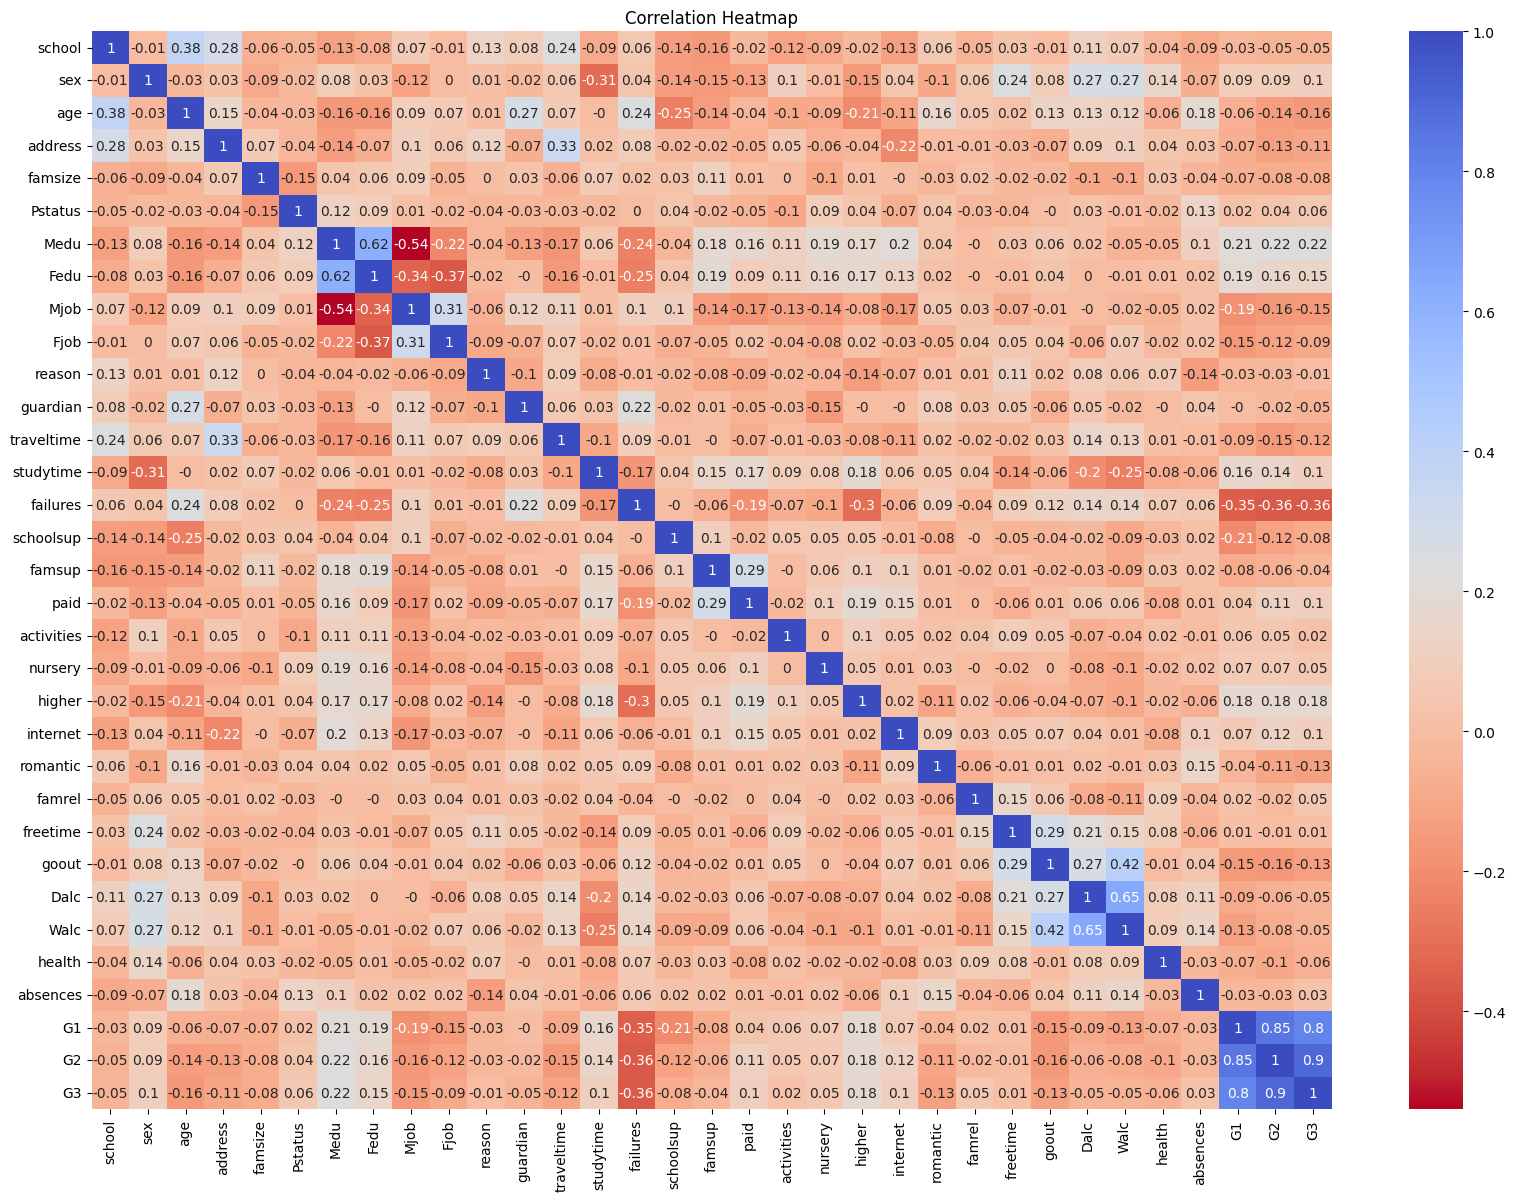

In [95]:
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True, cmap='coolwarm_r')
plt.title('Correlation Heatmap')
plt.show()

In [108]:
# defining independent and dependent variables
X = df2.drop(columns='Walc') # independent variables
y = df2['Walc']                            # dependent variable

In [109]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,0,4,3,4,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,0,5,3,3,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,0,4,3,2,2,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,1,3,2,2,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,0,4,3,2,1,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,2,2,...,0,5,5,4,4,4,11,9,9,9
391,1,1,17,0,0,0,3,1,2,2,...,0,2,4,5,3,2,3,14,16,16
392,1,1,21,1,1,0,1,1,4,4,...,0,5,5,3,3,3,3,10,8,7
393,1,1,18,1,0,0,3,2,2,4,...,0,4,4,1,3,5,0,11,12,10


In [110]:
y

0      1
1      1
2      3
3      1
4      2
      ..
390    5
391    4
392    3
393    4
394    3
Name: Walc, Length: 395, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 32)
(79, 32)
(316,)
(79,)


### Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [125]:
y_pred = model.predict(X_test)

In [126]:
y_pred

array([2.6997235, 2.8393424, 3.528007 , 3.126628 , 3.6487374, 3.5294924,
       3.2445564, 3.4826088, 3.5209084, 3.2139614, 2.933927 , 3.2793722,
       3.1912944, 3.311703 , 3.0691135, 3.1184206, 2.9782777, 3.6566758,
       2.6861603, 3.1849964, 3.4716268, 3.6216874, 2.841015 , 3.1363747,
       3.30164  , 3.2486625, 2.9381378, 3.4174612, 3.098446 , 3.0056193,
       2.9059658, 3.1220117, 3.2027538, 3.2421153, 3.1841455, 3.2571824,
       3.1313796, 3.347666 , 2.8400037, 3.8865592, 3.2637472, 3.1198378,
       3.4910274, 2.7613444, 3.3312674, 3.2592616, 3.4869363, 3.192945 ,
       3.2897804, 3.2153862, 2.7597992, 3.2864494, 3.3584514, 3.2171648,
       3.360948 , 2.9094942, 3.0540545, 3.6937468, 2.7830064, 2.961115 ,
       3.41573  , 3.626501 , 3.6164863, 3.1091552, 2.9208803, 2.914447 ,
       3.486196 , 2.7247472, 3.3147428, 3.4926364, 3.528007 , 3.1025825,
       3.4765825, 3.2385423, 3.0878053, 3.4926364, 3.0912573, 3.260764 ,
       3.3045135], dtype=float32)

In [128]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = round(r2_score(y_test, y_pred),2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)

print('R2:', r2)
print('RMSE:', rmse)

R2: -0.82
RMSE: 1.66


### Interpretation

* R2 Score: The closer it is to 1, the better the model is.
* Root Mean Squared Error (RMSE): The lower it is, the better.
* The model, at the moment, is pretty bad for predicting student's weekend alcohol consumption

In [153]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [154]:
model.feature_importances_

array([0.0160627 , 0.02330988, 0.01237923, 0.00824596, 0.01627787,
       0.00363792, 0.0123647 , 0.00409147, 0.01225267, 0.01507769,
       0.01330403, 0.00991486, 0.03732657, 0.02299601, 0.01991181,
       0.02711982, 0.01258757, 0.01325675, 0.01069209, 0.00908123,
       0.00561285, 0.01666533, 0.00727905, 0.01548372, 0.02354448,
       0.05790867, 0.46812466, 0.01457351, 0.02559382, 0.01643487,
       0.01796827, 0.03091998], dtype=float32)

In [155]:
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
features_df

,Feature,Importance
26,Dalc,0.468125
25,goout,0.057909
12,traveltime,0.037327
31,G3,0.030920
15,schoolsup,0.027120
28,absences,0.025594
24,freetime,0.023544
1,sex,0.023310
13,studytime,0.022996
14,failures,0.019912


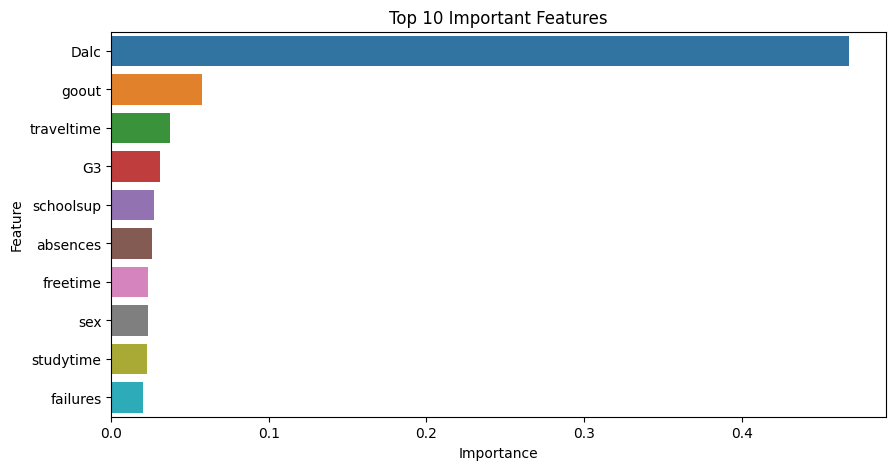

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(features_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.show()

We've managed to found out the top 10 features for predicting alcohol consumption. Let's do some feature selection.

## Efforts for a Better Model

### Feature Selection

In [173]:
X2 = df2[features_df['Feature'].head(10).tolist()] # updated training columns
y                                                  # remains the same

0      1
1      1
2      3
3      1
4      2
      ..
390    5
391    4
392    3
393    4
394    3
Name: Walc, Length: 395, dtype: int64

In [174]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(316, 10)
(79, 10)
(316,)
(79,)


### Feature Scaling

In [179]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [183]:
print(len(X2_train_scaled))
print(len(X2_test_scaled))

316
79


### Prepping the Model

In [292]:
model2 = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model2.fit(X2_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [293]:
y2_pred = model2.predict(X2_test_scaled)

In [294]:
y2_pred

array([2.125501 , 3.2672093, 2.0228033, 2.1771336, 4.1744995, 4.8352675,
       1.3297242, 1.1697845, 1.3419319, 1.7580429, 1.0625447, 1.8147575,
       2.6096587, 3.2281091, 3.5363734, 2.6882904, 1.2064854, 1.8898948,
       2.9480877, 1.203218 , 2.5861142, 4.510166 , 1.5355288, 1.201123 ,
       1.2598724, 0.9347521, 1.349788 , 1.38217  , 1.2208772, 1.9715614,
       3.6079652, 1.5185391, 1.3889694, 1.7681856, 1.2510896, 3.9960892,
       2.1556468, 1.3844572, 2.3556275, 2.4598665, 3.1848211, 1.2285514,
       1.6164956, 2.8792434, 1.3468978, 1.9530332, 1.9197391, 3.7313623,
       3.731169 , 1.3836949, 1.0249865, 1.1503454, 4.1535707, 3.3621264,
       2.6618257, 2.4994006, 1.8931229, 1.5128719, 0.9625843, 1.0780015,
       3.0217025, 3.447163 , 2.8368096, 3.0011873, 0.9754726, 3.2190192,
       3.3354268, 3.25521  , 2.5286856, 1.284485 , 1.2774212, 2.433362 ,
       1.7999886, 1.2015405, 1.3451679, 2.155243 , 1.4977971, 1.4216621,
       4.7261696], dtype=float32)

In [295]:
r2_2 = round(r2_score(y2_test, y2_pred),2)
rmse_2 = round(mean_squared_error(y2_test, y2_pred),2)

print('First Model:')
print('R2:', r2)
print('RMSE:', rmse)
print('-' * 20)
print('Second Model:')
print('R2:', r2_2)
print('RMSE:', rmse_2)

First Model:
R2: -0.82
RMSE: 1.66
--------------------
Second Model:
R2: 0.38
RMSE: 0.94


### Interpretation

* The second model performs much better than the first model
* The first model had a R2 score of -0.82 and a RMSE of 1.66
* The second model has a R2 score of 0.38 and a RMSE of 0.94
* Feature Selection has been helpful in reducing complexity and increasing the performance of the model

In [195]:
model2.feature_importances_

array([0.49327418, 0.07342299, 0.05374849, 0.04557316, 0.0688453 ,
       0.05934004, 0.0507924 , 0.07889692, 0.05061302, 0.02549345],
      dtype=float32)

### Finding the Optimal `n_estimators`

In [297]:
def calculate_optimal_trees(tree_count):
    prediction=[]
    r2=[]
    rmse=[]
    for i in range(tree_count):
        model3 = XGBRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
        model3.fit(X2_train_scaled, y2_train)
        prediction.append(model3.predict(X2_test_scaled))
        r2.append(r2_score(y2_test, prediction[i]))
        rmse.append(mean_squared_error(y2_test, prediction[i]))
    
    return (r2, rmse)

In [281]:
optimal_tree_count = calculate_optimal_trees(100)

In [282]:
optimal_tree_count

([-1.6412801778907244,
  0.041704031082691495,
  0.13142583324278145,
  0.19582553900885924,
  0.2476096241905985,
  0.28498736643681666,
  0.31641379175823137,
  0.3483536975990834,
  0.37402764866134375,
  0.39129922282449914,
  0.4041025523358247,
  0.4138655276356099,
  0.4232438908372774,
  0.42809060302225577,
  0.42883970231226176,
  0.42601926643517807,
  0.42323246857810515,
  0.4253063872484638,
  0.4210459405297322,
  0.417118335760162,
  0.41519037978592066,
  0.41285287142394933,
  0.4149697729366729,
  0.4142206644021983,
  0.4140078588168459,
  0.4162893606059699,
  0.41592125194062957,
  0.41939144498521774,
  0.4206262348730825,
  0.42228156383784277,
  0.4185172972060808,
  0.4137673503354532,
  0.4187546012049037,
  0.4168889112339804,
  0.41613465834362473,
  0.418575166359455,
  0.412368089920367,
  0.4123968148001571,
  0.40488396575785557,
  0.40155448215275724,
  0.3985643615988328,
  0.3953867789356621,
  0.39394021670306967,
  0.39211975517512543,
  0.39067032

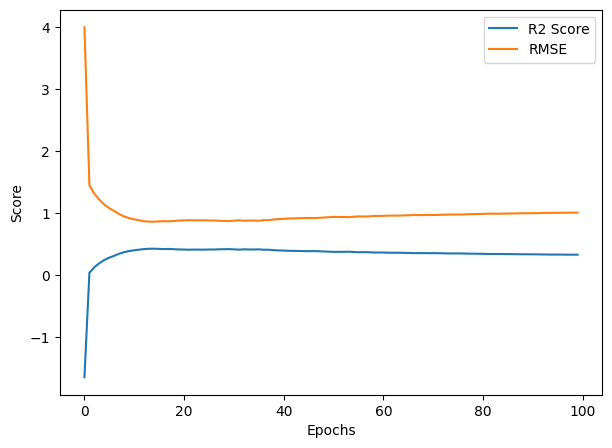

In [296]:
plt.figure(figsize=(7,5))
sns.lineplot(optimal_tree_count[0], label='R2 Score')
sns.lineplot(optimal_tree_count[1], label='RMSE')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [284]:
print('Maximum R2 Score:', np.max(optimal_tree_count[0]))
print('Optimal epoch count:', np.argmax(optimal_tree_count[0]))

Maximum R2 Score: 0.42883970231226176
Optimal epoch count: 14


In [285]:
print('Minimum RMSE:', np.min(optimal_tree_count[1]))
print('Optimal epoch count:', np.argmin(optimal_tree_count[1]))

Minimum RMSE: 0.8642906347320941
Optimal epoch count: 14


The optimal no of `n_estimators` or no. of trees is 14, which offers the highest R2 score and the least RMSE.

**Let's try it out then!**

In [287]:
model4 = XGBRegressor(n_estimators=14, learning_rate=0.1, random_state=42)
model4.fit(X2_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=14, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [289]:
y4_pred = model4.predict(X2_test_scaled)
y4_pred

array([2.1769338, 2.8158576, 2.0439746, 2.122251 , 3.546317 , 4.1814694,
       1.7219648, 1.5734848, 1.5852154, 1.9637173, 1.3913145, 1.5337656,
       2.5021734, 2.9932964, 3.1901994, 2.9286504, 1.5031492, 2.0468874,
       2.5633717, 1.5363251, 2.6057146, 3.9685853, 1.8476846, 1.6843785,
       1.502915 , 1.4303579, 1.8157793, 1.5443591, 1.7272121, 2.1711493,
       3.1976671, 1.6651924, 1.4707345, 1.776041 , 1.5418591, 3.5182207,
       2.3301094, 1.4480516, 2.5910442, 2.5986853, 2.8861704, 1.5048959,
       1.7762765, 2.6368484, 1.5482267, 1.8067592, 2.1232743, 3.2422333,
       3.3647656, 1.803323 , 1.5665331, 1.4307777, 3.6888855, 3.11854  ,
       2.435243 , 2.5450613, 2.0121846, 1.6478754, 1.3913145, 1.4307777,
       2.8396878, 3.2607613, 2.968957 , 3.0916924, 1.5377041, 2.7578657,
       3.0752244, 2.9527678, 2.122251 , 1.5555434, 1.5401611, 2.522253 ,
       1.9399608, 1.6257092, 1.561633 , 2.122251 , 1.5503591, 1.4707345,
       4.022047 ], dtype=float32)

In [299]:
r2_4 = round(r2_score(y2_test, y4_pred),2)
rmse_4 = round(mean_squared_error(y2_test, y4_pred),2)

In [300]:
print('First Model:')
print('R2:', r2)
print('RMSE:', rmse)
print('-' * 20)
print('Second Model:')
print('R2:', r2_2)
print('RMSE:', rmse_2)
print('-' * 20)
print('Final model:')
print('R2:', r2_4)
print('RMSE:', rmse_4)

First Model:
R2: -0.82
RMSE: 1.66
--------------------
Second Model:
R2: 0.38
RMSE: 0.94
--------------------
Final model:
R2: 0.43
RMSE: 0.86


## Final Observations

* Feature Selection has been helpful in reducing complexity and increasing the performance of the model
* The optimal no. of `n_estimators` is 14
* The final model performs the best with **R2 score of 0.43** and **RMSE of 0.86**
* The `Dalc` feature plays the most important role